In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import scipy.interpolate as interpolate
from scipy.interpolate import lagrange

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y evalue $f''(\pi/8)$ con $h = 0.05$.
* Encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [5]:

def fpd(f, x, h):
  return (-f(x + 2*h) + 8*f(x + h) - 8*f(x - h) + f(x - 2*h)) / (12*h)

x=np.linspace(0,2*np.pi,10)


f_trig=np.cos


f_eval=f_trig(x)

df=fpd(f_trig,x,0.05)


df_interpol=lagrange(x,df)

df_2=fpd(df_interpol,x,0.05)

df_2_interpol=lagrange(x,df_2)

print(df_2_interpol(np.pi/8))


-0.9240727505539883


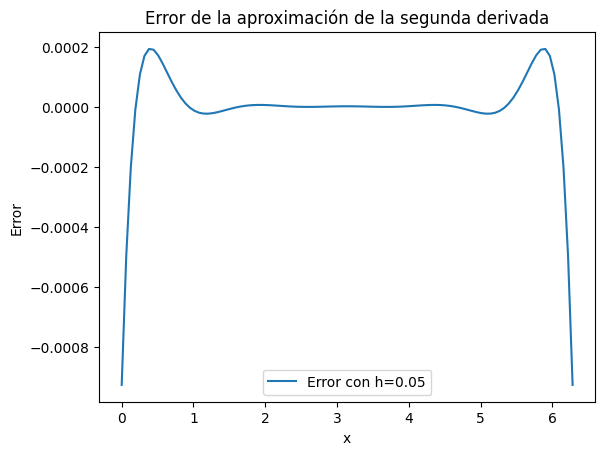

In [6]:
x_valores=np.linspace(0,2*np.pi,100)

d2_exacta=-np.cos(x_valores)


error=d2_exacta-df_2_interpol(x_valores)

plt.plot(x_valores, error, label='Error con h=0.05', )
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error de la aproximación de la segunda derivada')
plt.legend()
plt.show()

In [9]:
#comparacion del error con h mayor
f_eval=f_trig(x)

df_mayor= fpd(f_trig,x,1)


df_interpol_mayor=lagrange(x,df_mayor)

df_2_mayor=fpd(df_interpol_mayor,x,1)

df_2_interpol_mayor=lagrange(x,df_2_mayor)


error_mayor=d2_exacta-df_2_interpol_mayor(x_valores)

#comparacion del error con h menor
f_eval=f_trig(x)

df_menor= fpd(f_trig,x,0.00001)


df_interpol_menor=lagrange(x,df_menor)

df_2_menor= fpd(df_interpol_menor,x,0.00001)

df_2_interpol_menor=lagrange(x,df_2_menor)

error_menor=d2_exacta-df_2_interpol_menor(x_valores)

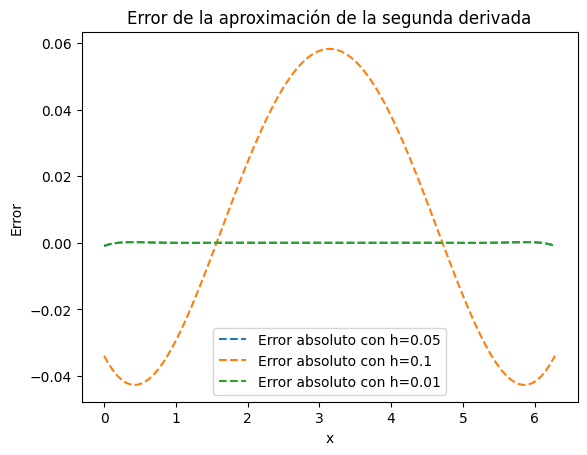

In [10]:
plt.plot(x_valores, error, label='Error absoluto con h=0.05',  linestyle='--')
plt.plot(x_valores, error_mayor, label='Error absoluto con h=0.1', linestyle='--')
plt.plot(x_valores, error_menor, label='Error absoluto con h=0.01', linestyle='--')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error de la aproximación de la segunda derivada')
plt.legend()
plt.show()

In [11]:
print(np.mean(error_mayor))
print(np.mean(error_menor))
print(np.mean(error))


0.00304414821559501
-1.0122634748454851e-05
-1.0114472382135344e-05


Disminuye considerablemente con h menores

#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`
*   ¿Cuál será el valor óptimo de $h$?

In [12]:
import numpy as np
from scipy.misc import derivative
f= lambda x:x*np.exp(x)
x=np.linspace(1.8,2.2,6)
primera_derivada_sp=derivative(f,2,dx=1e-6)
print(primera_derivada_sp)
segunda_derivada_sp=derivative(f,2,dx=1e-6,n=2)
print(segunda_derivada_sp)

22.167168297393403
29.560354164459568


<ipython-input-12-cfae9c079277>:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  primera_derivada_sp=derivative(f,2,dx=1e-6)
<ipython-input-12-cfae9c079277>:7: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  segunda_derivada_sp=derivative(f,2,dx=1e-6,n=2)


In [13]:
derivada=np.gradient(f(x),x)

derivada_2=np.gradient(derivada,x)

derivada_int=lagrange(x,derivada)

derivada_int=lagrange(x,derivada)

derivada_2_int=lagrange(x,derivada_2)

#evaluamos
print(derivada_int(2))
print(derivada_2_int(2))


22.19959710049443
30.77327252854593


In [14]:
h_valores=np.linspace(0.001,0.1,10)

In [15]:
primera_derivada_error=np.zeros(len(h_valores))
segunda_derivada_error=np.zeros(len(h_valores))

<ipython-input-18-7336ef492806>:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  primera_derivada_error = [derivative(f, 2, dx=h) for h in h_valores]
<ipython-input-18-7336ef492806>:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  segunda_derivada_error = [derivative(f, 2, dx=h, n=2) for h in h_valores]


[22.16717445433769, 22.16805499246166, 22.1704257596436, 22.174286996852878, 22.17963909655373, 22.186482602749958, 22.194818211045273, 22.204646768720906, 22.21596927482981, 22.228786880307297]
[29.556228090754644, 29.556756411166752, 29.558178847017732, 29.560495489576496, 29.563706488380355, 29.567812050635528, 29.57281244130886, 29.578707983118765, 29.585499056578236, 29.593186100007422]
[22.16717445433769, 22.16805499246166, 22.1704257596436, 22.174286996852878, 22.17963909655373, 22.186482602749958, 22.194818211045273, 22.204646768720906, 22.21596927482981, 22.228786880307297]
[29.556228090754644, 29.556756411166752, 29.558178847017732, 29.560495489576496, 29.563706488380355, 29.567812050635528, 29.57281244130886, 29.578707983118765, 29.585499056578236, 29.593186100007422]
[22.16717445433769, 22.16805499246166, 22.1704257596436, 22.174286996852878, 22.17963909655373, 22.186482602749958, 22.194818211045273, 22.204646768720906, 22.21596927482981, 22.228786880307297]
[29.55622809075

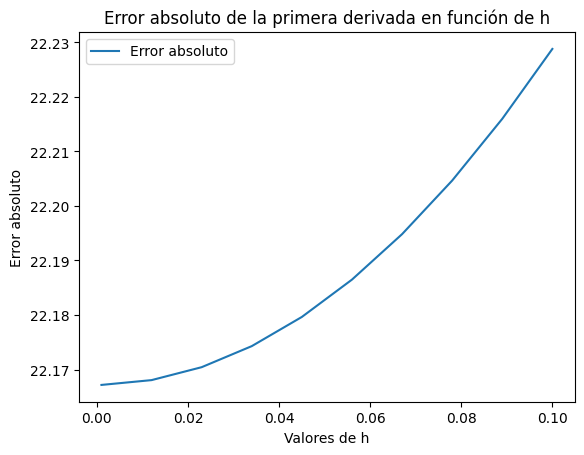

In [18]:
for h in h_valores:
  primera_derivada_error = [derivative(f, 2, dx=h) for h in h_valores]
  print(primera_derivada_error)

  segunda_derivada_error = [derivative(f, 2, dx=h, n=2) for h in h_valores]
  print(segunda_derivada_error)

primera_derivada_error_int = lagrange(h_valores, primera_derivada_error)
segunda_derivada_error_int=lagrange(h_valores,segunda_derivada_error)

error_primera=np.abs(primera_derivada_error-derivada_int)
error_segunda=np.abs(segunda_derivada_error-derivada_2_int)


plt.plot(h_valores, primera_derivada_error_int(h_valores), label=f'Error absoluto', linewidth=1.5)

plt.title('Error absoluto de la primera derivada en función de h')
plt.xlabel('Valores de h')
plt.ylabel('Error absoluto')
plt.legend( loc='best')
plt.show()

En la medida que aumenta el h, aumenta el error, por lo tanto se debe usar tan pequeño como sea posible

#3.
Compare la primera derivada del punto 2 usando los métodos de diferencias finitas, derivada de tres y cinco puntos para el $h$ con el menor error encontrado en el punto anterior. Compare de nuevo para $f'(2)$ y encuentre los errores.

In [19]:
f = lambda x: x * np.exp(x)
x0 = 2.0
def df(f, x, h):
  return (f(x + h) - f(x)) / h

def dtp(f, x, h):
  return (f(x + h) - f(x - h)) / (2 * h)

def dcp(f, x, h):
  return (-f(x + 2 * h) + 8 * f(x + h) - 8 * f(x - h) + f(x - 2 * h)) / (12 * h)

In [23]:
h_optimo = 0.001  #valor de h con el menor error

derivada_df = df(f, x0, h_optimo)
derivada_dtp = dtp(f, x0, h_optimo)
derivada_dcp = dcp(f, x0, h_optimo)

derivada_real = derivative(f, 2, dx=1e-6)

<ipython-input-23-a1c2d2ff9bd4>:7: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivada_real = derivative(f, 2, dx=1e-6)


In [26]:
error_df = abs(derivada_df - derivada_real)
error_dtp = abs(derivada_dtp - derivada_real)
error_dcp = abs(derivada_dcp - derivada_real)






print("diferencias finitas:", derivada_df, "Error:", error_df)
print("tres puntos:", derivada_dtp, "Error:", error_dtp)
print("cinco puntos:", derivada_dcp, "Error:", error_dcp)

diferencias finitas: 22.181952568383068 Error: 0.01478427098966506
tres puntos: 22.16717445433769 Error: 6.156944287738497e-06
cinco puntos: 22.167168296788702 Error: 6.047002898412757e-10
